In [12]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('out/data_headlines_1300.xlsx')
df['Sentiment'] = df['Sentiment'].str.rstrip()

In [3]:
numb_rows = 1300

In [5]:
df.Sentiment.value_counts()

bullish    561
neutral    537
bearish    201
Name: Sentiment, dtype: int64

In [8]:
df

,News_Title,Time,Ticker,Sentiment,Labellers,Unnamed: 5,sentiment map
0,Applied Optoelectronics (AAOI) May Report Nega...,Apr-29-21 05:03PM,AAOI,bearish,NaN,NaN,bullish
1,Applied Optoelectronics Announces Date of Firs...,Apr-15-21 04:10PM,AAOI,neutral,NaN,NaN,bearish
2,Have Insiders Been Buying Applied Optoelectron...,Mar-07-21 01:03AM,AAOI,bullish,NaN,NaN,neutral
3,Why Applied Optoelectronics Stock Tanked Today,Feb-26-21 12:43PM,AAOI,bearish,NaN,NaN,NaN
4,Applied Optoelectronics Inc (AAOI) Q4 2020 Ear...,Feb-25-21 08:01PM,AAOI,neutral,NaN,NaN,NaN
...,...,...,...,...,...,...,...
58142,2 Top Tech Stocks Under $20 Per Share,Jul-28-20 06:49AM,ZUO,NaN,NaN,NaN,NaN
58143,Zuora Helps The Seattle Times Meet Its Digital...,Jul-23-20 08:00AM,ZUO,NaN,NaN,NaN,NaN
58144,Zuora Welcomes Two New Members to its Board of...,Jul-22-20 04:46PM,ZUO,NaN,NaN,NaN,NaN
58145,"Did Hedge Funds Make The Right Call On Zuora, ...",Jul-17-20 02:06PM,ZUO,NaN,NaN,NaN,NaN


In [10]:
class_names = ['bearish', 'neutral', 'bullish']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


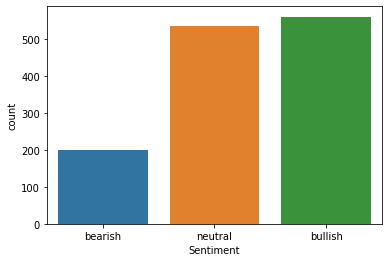

In [13]:
ax = sns.countplot(df.Sentiment)
plt.xlabel('Sentiment')
ax.set_xticklabels(class_names);

In [9]:
df = df.drop(['Time', 'Labellers', 'Unnamed: 5', 'sentiment map'], axis = 1).iloc[:numb_rows]

In [12]:
df.Sentiment.value_counts()

bullish    561
neutral    537
bearish    201
Name: Sentiment, dtype: int64

In [13]:
df.to_csv('cleaned_headlines_untokinized_1300.csv', index=False)

* cleaning/ preprocessing

In [9]:
def preprocess(review_column):
    # STEP 1 : split into words
    tokens = review_column.apply(lambda x: word_tokenize(x))
    
    # STEP 2: remove all tokens that are not alphabetic
    words = tokens.apply(lambda x: [i for i in x if i.isalpha()])
    
    # STEP 3: convert text to lowercase
    words = words.apply(lambda x: [i.lower() for i in x])
    
    #STEP 4: REMOVING STOPWORDS
    stop_words = stopwords.words('english')
    words = words.apply(lambda x: [i for i in x if not i in stop_words])
    
    #STEP 5: Lemmatizing
    lemmatizer = WordNetLemmatizer()
    words = words.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
    return words

In [10]:
News_title_clean = preprocess(df.News_Title)

In [11]:
df = df.drop('News_Title', axis = 1)

In [12]:
df_merged = pd.concat([df, News_title_clean], axis = 1)

In [13]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [14]:
headlines = list(map(listToString, df_merged.News_Title))

In [15]:
df_true = df_merged[['News_Title', 'Sentiment']]

* export clean data set

In [16]:
compression_opts = dict(method='zip',
                        archive_name='cleaned_headlines_1105.csv')
df_true.to_csv('cleaned_headlines.zip', index=False, compression=compression_opts)